<!-- Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing details of
customers to predict customer response for special offer.
Create confusion matrix based on above data and find
a) Accuracy
b) Precision
c) Recall
d) F-1 score -->

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [10]:
ds = pd.read_csv('admission.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [11]:
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:

ds['Admitted'] = ds['Chance of Admit'].apply(lambda x: 'Yes' if x >= 0.80 else 'No')
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,Yes
1,2,324,107,4,4.0,4.5,8.87,1,0.76,No
2,3,316,104,3,3.0,3.5,8.00,1,0.72,No
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Yes
4,5,314,103,2,2.0,3.0,8.21,0,0.65,No


In [13]:
encoder = LabelEncoder()
ds['Admitted'] = encoder.fit_transform(ds['Admitted'])
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


Confusion Matrix:


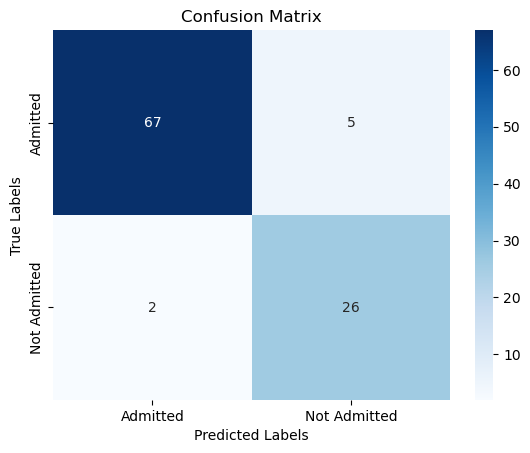

Accuracy: 0.9300
Precision: 0.8387
Recall: 0.9286
F1 Score: 0.8814


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x = ds.drop('Admitted', axis=1)
y = ds['Admitted']

x_train , x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LogisticRegression(solver='liblinear')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Admitted', 'Not Admitted'], yticklabels=['Admitted', 'Not Admitted'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")